# Ejercicio de regresion logistica

## Importar librerias

In [474]:
##Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [475]:
from sklearn import preprocessing

In [476]:

from sklearn.model_selection import train_test_split

In [477]:
from sklearn.preprocessing import MinMaxScaler

## Funciones

In [478]:
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

In [479]:
##FUncion reemplazo de datos categóricos NAN
def imputacionCatNA(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

In [480]:
## Funcion para binarizar datos categoricos de solo dos opciones
def binarizar(df,nomCol):
    label_e = preprocessing.LabelEncoder()
    df[nomCol] = label_e.fit_transform(df[nomCol])
    return df

## Importar Dataset

In [481]:
url = "https://raw.githubusercontent.com/jaquimbayoc8/DiplomadoMLA2023/main/5.RegresionLogistica/Dataset/weatherAUS.csv"
df = pd.read_csv(url)

## Extracion de datos


In [482]:
##Extraer los encabezados del dataframe
enca = df.columns
print(enca)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [483]:
## Sacar las variables Categóricas
categoricas = [i for i in df.columns if df[i].dtype=='O']

print('Hay {} variables de tipo categórico'.format(len(categoricas)))

print('Las variables categóricas son:', categoricas)

Hay 7 variables de tipo categórico
Las variables categóricas son: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


## Observacion de datos

In [484]:
df_cate = df[categoricas]

df_cate.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [485]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 7 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                    Date     object        3436          0
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


In [486]:
df_cate[categoricas].isnull().sum()  ## Conteo de valores Nulos o NaN

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [487]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 7 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                    Date     object        3436          0
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


### Vamos a sacar los conteos de datos NAN sin los valores de cero

In [488]:
## Vamos a sacar los conteos de datos NAN sin los valores de cero
cat1 = [i for i in categoricas if df[i].isnull().sum()!= 0]
print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


### Revisar las etiquetas u opciones de las variables

In [489]:
##Revisar las etiquetas u opciones de las variables
for i in categoricas:
    print(i, 'contiene', len(df[i].unique()),'Etiquetas')

Date contiene 3436 Etiquetas
Location contiene 49 Etiquetas
WindGustDir contiene 17 Etiquetas
WindDir9am contiene 17 Etiquetas
WindDir3pm contiene 17 Etiquetas
RainToday contiene 3 Etiquetas
RainTomorrow contiene 3 Etiquetas


### Podemos observar caracteristicas importantes como la cantidad de etiquetas,tipo de dato, nombre columna y la cantidad de tipos NaN, osea que es una data 'Sucia'

## Vamos a limpiar la data

### Para esto primero vamos a categorizar la fecha por dia, mes y año

In [490]:
df_date_ = pd.DataFrame()

In [491]:
##categorica la fecha - Date

df_date_['Date'] = pd.to_datetime(df_cate['Date'])

In [492]:
###Extraer el año a una columna
df_cate['Year'] = df_date_['Date'].dt.year

df_cate['Year']



0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145455    2017
145456    2017
145457    2017
145458    2017
145459    2017
Name: Year, Length: 145460, dtype: int64

In [493]:
###Extracción de mes
df_cate['Month'] = df_date_['Date'].dt.month

df_cate['Month']

0         12
1         12
2         12
3         12
4         12
          ..
145455     6
145456     6
145457     6
145458     6
145459     6
Name: Month, Length: 145460, dtype: int64

In [494]:
###Extracción de dia
df_cate['Day'] = df_date_['Date'].dt.day

df_cate['Day']



0          1
1          2
2          3
3          4
4          5
          ..
145455    21
145456    22
145457    23
145458    24
145459    25
Name: Day, Length: 145460, dtype: int64

In [495]:
##Eliminar la fecha normal
df_cate.drop('Date', axis=1, inplace=True)

### Eliminar las columnas de Date , Year, Month y Day

In [496]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 9 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267
                                    Year      int64          11          0
                                   Month      int64          12          0
                                     Day      int64          31          0


In [497]:
# Seleccionar las tres columnas
df_fecha = df_cate[['Year', 'Month', 'Day']]

# Eliminar las columnas del dataframe original
df_cate.drop(columns=['Year', 'Month', 'Day'], inplace=True)

In [498]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 6 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


## Eliminar datos NaN o imputar datos con la moda

In [499]:
##categoricas2 = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']
##for col in categoricas2:
    ##moda = df_cate[col].mode()[0]
    #df_cate[col].fillna(moda, inplace=True)


In [500]:
datos_NAN(df_cate)

Dimesiones: 145460 filas, 6 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object          16      10326
                              WindDir9am     object          16      10566
                              WindDir3pm     object          16       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


### Vemos como tenemos ya nuestra data limpia

## **Tarea 1: Agregar las variables dummies al df original y eliminar la columna de base**

In [501]:
## Nuevo df
df_dum = df_cate


In [502]:
# pd.get_dummies(df_dum.Location, drop_first=True)

## Vamos a recategorizar

In [503]:
nombres_columnas = {
    'W': 'Oeste',
    'WNW': 'NorOeste',
    'WSW': 'SurOeste',
    'NE': 'NorEste',
    'NNW': 'NorOeste',
    'N': 'Norte',
    'NNE': 'NorEste',
    'SW': 'SurOeste',
    'ENE': 'NorEste',
    'SSE': 'SurEste',
    'S': 'Sur',
    'NW': 'NorOeste',
    'SE': 'SurEste',
    'ESE': 'SurEste',
    'E': 'Este',
    'SSW': 'SurOeste',

}

wind_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in wind_columns:
    df_dum[col] = df_dum[col].replace(nombres_columnas)


In [504]:
print(df_dum['WindGustDir'].unique())

['Oeste' 'NorOeste' 'SurOeste' 'NorEste' 'Norte' nan 'SurEste' 'Sur'
 'Este']


In [505]:
print(df_dum['WindDir9am'].unique())

['Oeste' 'NorOeste' 'SurEste' 'NorEste' 'SurOeste' 'Sur' nan 'Norte'
 'Este']


In [506]:
print(df_dum['WindDir3pm'].unique())

['NorOeste' 'SurOeste' 'Este' 'Oeste' 'SurEste' 'NorEste' 'Norte' 'Sur'
 nan]


In [507]:
datos_NAN(df_dum)

Dimesiones: 145460 filas, 6 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object           8      10326
                              WindDir9am     object           8      10566
                              WindDir3pm     object           8       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


## Vamos hacer dummies a las variables

In [508]:
## Vamos a binarizar las variables categorias con solo 2 opciones y las demas con dummies
### Lo vamos hacer con preprocessing de sklearn para el primer caso

for col in df_dum.columns:
    # Comprobar si la columna es categórica con 2 opciones
    if df_dum[col].nunique() == 2:
         pd.get_dummies(df_dum[col], drop_first=True)
    
    else:
        pd.get_dummies(df_dum[col], drop_first=True, dummy_na=True)


datos_NAN(df_dum)

Dimesiones: 145460 filas, 6 columnas
Total de Valores NAN: 31648
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object           8      10326
                              WindDir9am     object           8      10566
                              WindDir3pm     object           8       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267


In [509]:
print(df_dum['RainTomorrow'].unique())

['No' 'Yes' nan]


In [510]:
print(df_cate['RainToday'].unique())

['No' 'Yes' nan]


In [511]:
print(df_dum['RainToday'].unique())

['No' 'Yes' nan]


## Vamos a concatenar nuestras variables dummies con el df_fecha y el df original

In [512]:
##Categóricas y numéricas
numericas = [i for i in df.columns if df[i].dtype!='O']

print('Hay {} variables de tipo numerico'.format(len(numericas)))

print('Las variables categóricas son:', numericas)

Hay 16 variables de tipo numerico
Las variables categóricas son: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [513]:
df_numerico = df[numericas]

In [514]:
df_f = pd.concat([df_dum, df_numerico], axis=1)

In [515]:
df_f_f = pd.concat([df_f, df_fecha],axis=1)

In [516]:
##Rain today y rain tomorrow
df_f_f['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

## Graficas

Text(0, 0.5, 'Cant Viento 3pm')

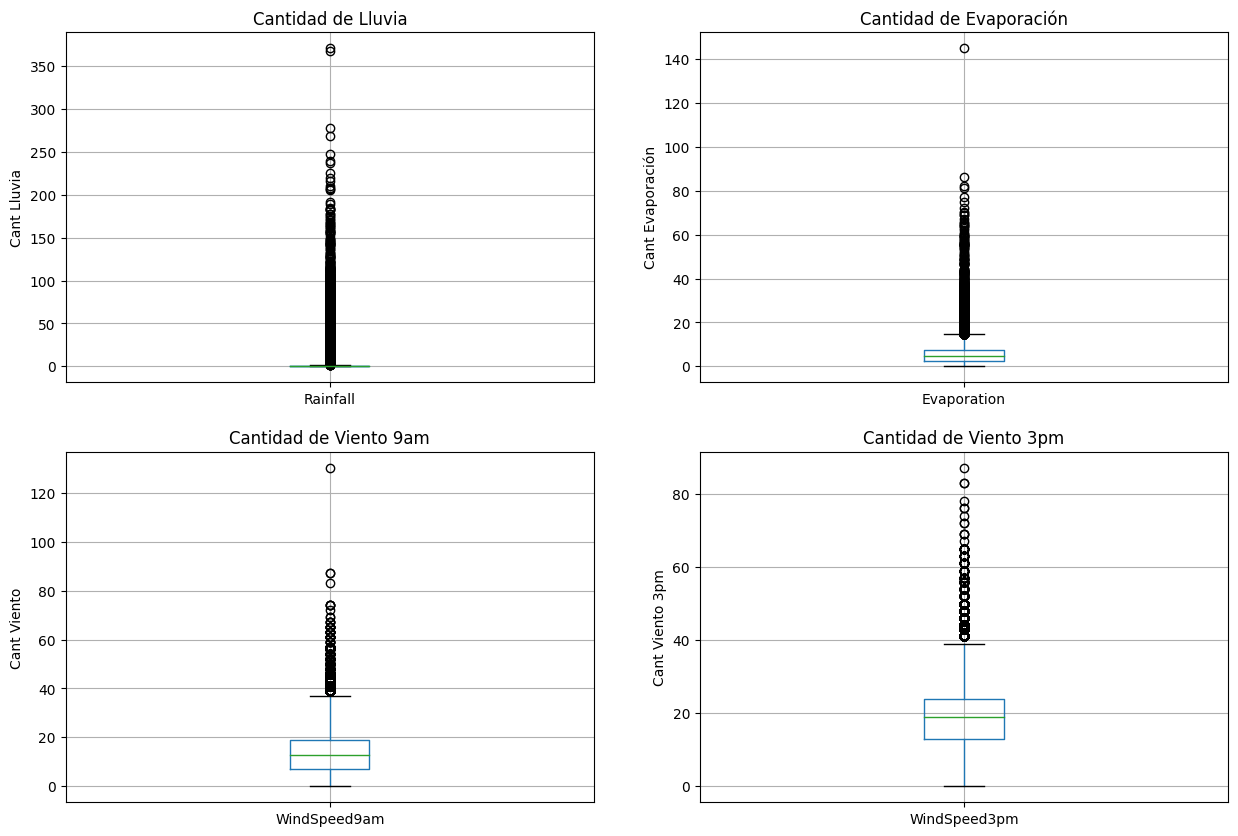

In [517]:
##Grafica para ver el ruido en los datos
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df_f_f.boxplot(column='Rainfall')
fig.set_title('Cantidad de Lluvia')
fig.set_ylabel('Cant Lluvia')

plt.subplot(2,2,2)
fig = df_f_f.boxplot(column='Evaporation')
fig.set_title('Cantidad de Evaporación')
fig.set_ylabel('Cant Evaporación')

plt.subplot(2,2,3)
fig = df_f_f.boxplot(column='WindSpeed9am')
fig.set_title('Cantidad de Viento 9am')
fig.set_ylabel('Cant Viento')

plt.subplot(2,2,4)
fig = df_f_f.boxplot(column='WindSpeed3pm')
fig.set_title('Cantidad de Viento 3pm')
fig.set_ylabel('Cant Viento 3pm')

Text(0, 0.5, 'Llover Mañana')

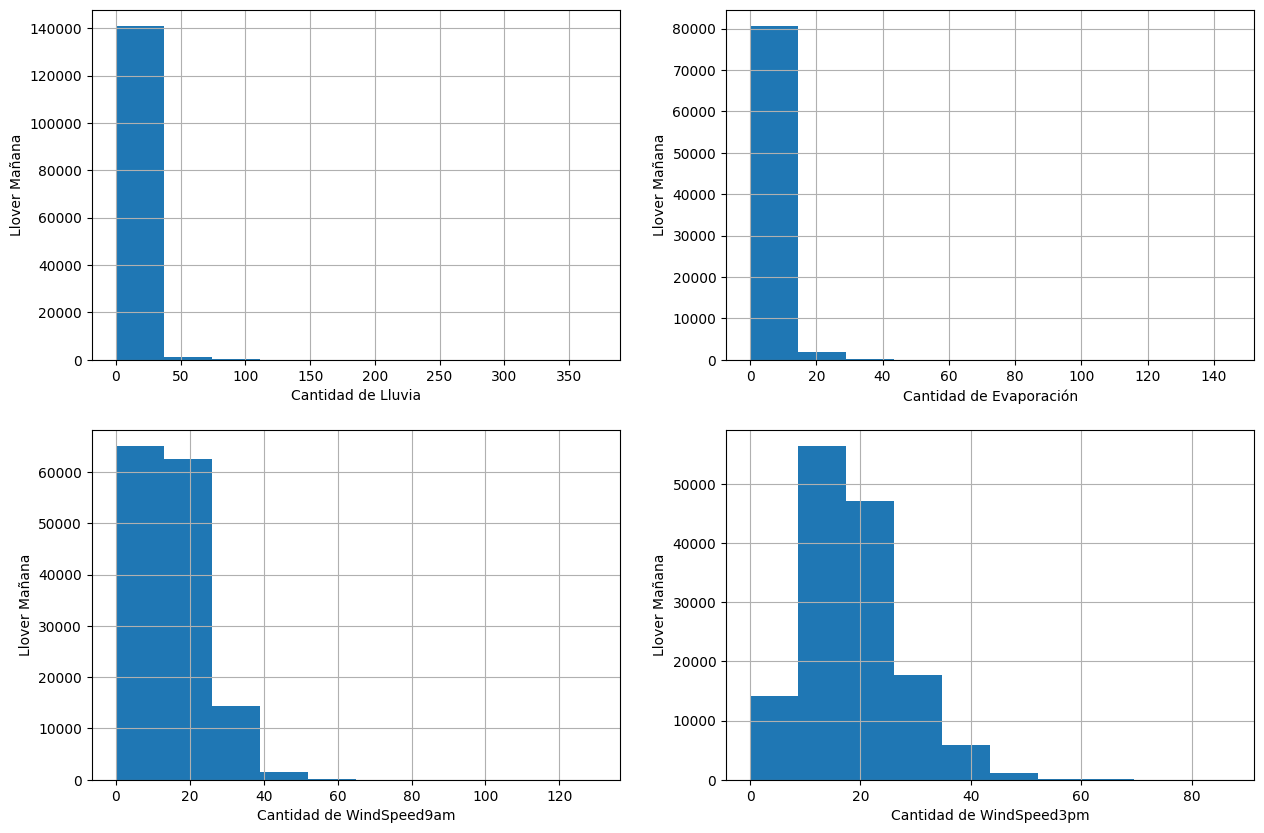

In [518]:
##Ver distribución de variables
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df_f_f.Rainfall.hist(bins=10)
fig.set_xlabel('Cantidad de Lluvia')
fig.set_ylabel('Llover Mañana')

plt.subplot(2,2,2)
fig = df_f_f.Evaporation.hist(bins=10)
fig.set_xlabel('Cantidad de Evaporación')
fig.set_ylabel('Llover Mañana')

plt.subplot(2,2,3)
fig = df_f_f.WindSpeed9am.hist(bins=10)
fig.set_xlabel('Cantidad de WindSpeed9am')
fig.set_ylabel('Llover Mañana')


plt.subplot(2,2,4)
fig = df_f_f.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('Cantidad de WindSpeed3pm')
fig.set_ylabel('Llover Mañana')

In [519]:
##Rango del ruido de esas variable numéricas - rango intercuantilico
IQR1 = df_f_f.Rainfall.quantile(0.75)- df.Rainfall.quantile(0.25)
puntomin = df_f_f.Rainfall.quantile(0.25) - (IQR1*3)
puntomax = df_f_f.Rainfall.quantile(0.75) + (IQR1*3)

print('Rainfall el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR1)
##El ruido arranca desde >3.2

Rainfall el ruido esta entre los valores -2.4000000000000004 y 3.2
El rango IQR es: 0.8


In [520]:
IQR2 = df_f_f.Evaporation.quantile(0.75)- df.Evaporation.quantile(0.25)
puntomin = df_f_f.Evaporation.quantile(0.25) - (IQR2*3)
puntomax = df_f_f.Evaporation.quantile(0.75) + (IQR2*3)

print('Evaporation el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR2)

Evaporation el ruido esta entre los valores -11.800000000000002 y 21.800000000000004
El rango IQR es: 4.800000000000001


In [521]:
IQR3 = df_f_f.WindSpeed9am.quantile(0.75)- df.WindSpeed9am.quantile(0.25)
puntomin = df_f_f.WindSpeed9am.quantile(0.25) - (IQR3*3)
puntomax = df_f_f.WindSpeed9am.quantile(0.75) + (IQR3*3)

print('WindSpeed9am el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR3)

WindSpeed9am el ruido esta entre los valores -29.0 y 55.0
El rango IQR es: 12.0


In [522]:
IQR4 = df_f_f.WindSpeed3pm.quantile(0.75)- df.WindSpeed3pm.quantile(0.25)
puntomin = df_f_f.WindSpeed3pm.quantile(0.25) - (IQR4*3)
puntomax = df_f_f.WindSpeed3pm.quantile(0.75) + (IQR4*3)

##df['Age'] = np.where(df['Age']>57.0,IQR,df['Age'] )

print('WindSpeed3pm el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR4)

WindSpeed3pm el ruido esta entre los valores -20.0 y 57.0
El rango IQR es: 11.0


In [523]:
datos_NAN(df_f_f)

Dimesiones: 145460 filas, 25 columnas
Total de Valores NAN: 343248
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object           8      10326
                              WindDir9am     object           8      10566
                              WindDir3pm     object           8       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267
                                 MinTemp    float64         389       1485
                                 MaxTemp    float64         505       1261
                                Rainfall    float64         681       3261
                             Evaporation    float64         358      62790
                                Sunshine    float64         145      69835
                           

**Eliminar el ruido en las variables numéricas**

In [524]:
df_f_IQR = df_f_f

In [525]:
for i in df_f_f:
    if df_f_f[i].dtype=='float64':
        Q1 = df_f_f[i].quantile(0.25)
        Q3 = df_f_f[i].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mediana = np.median(df_f_f[i])
        for m in df_f_f[i]:
            if m > upper or m < lower:
                df_f_f[i] = df_f_f[i].replace(m, mediana)

In [526]:
##for i in df_f_f:
    ##if df_f_f[i].dtype=='float64':
       ## df_f_f[i].replace(to_replace=np.nan, value=df_f_f[i].median(), inplace=True)

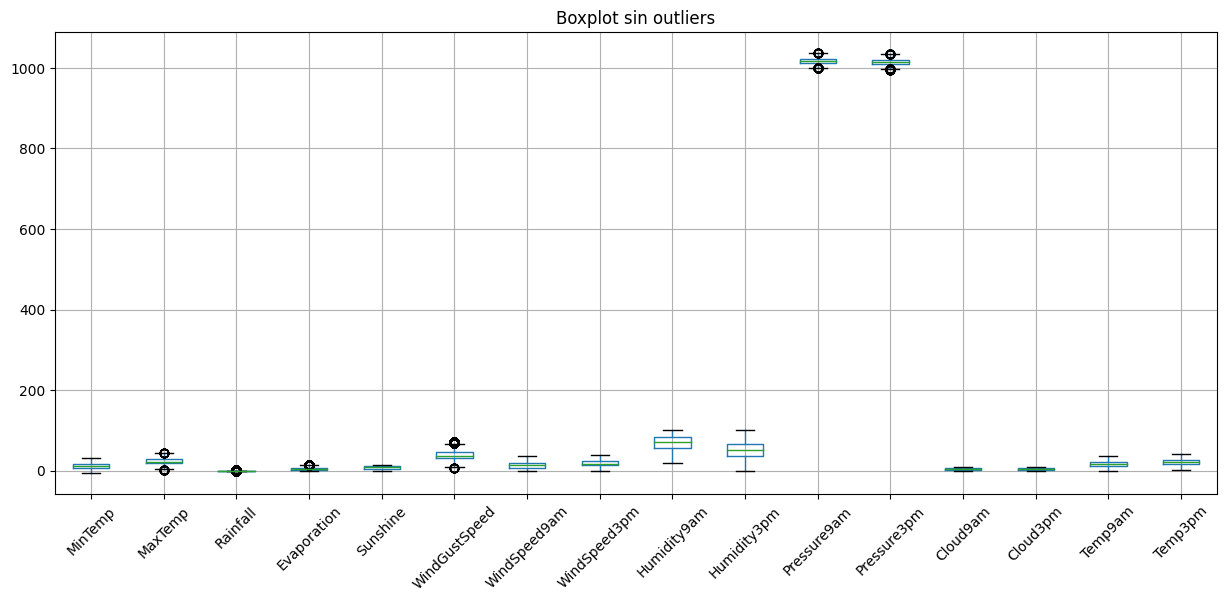

In [527]:
#Se analizan observa la eliminación de los outliers
plt.figure(figsize=[15,6])
plt.title('Boxplot sin outliers')
df_f_f.boxplot(column= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'])
plt.xticks(rotation=45)
plt.show()

In [528]:
datos_NAN(df_f_f)

Dimesiones: 145460 filas, 25 columnas
Total de Valores NAN: 383357
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object           8      10326
                              WindDir9am     object           8      10566
                              WindDir3pm     object           8       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267
                                 MinTemp    float64         367       1539
                                 MaxTemp    float64         412       1750
                                Rainfall    float64          21      28839
                             Evaporation    float64         145      64785
                                Sunshine    float64         145      69835
                           

In [529]:
#df_f_IQR_ = df_f_f[(df_f_f['Rainfall'] >= puntomin) & (df_f_f['Rainfall'] <= puntomax)]


In [530]:
#df_f_IQR_ = df_f_f[(df_f_f['Evaporation'] >= puntomin) & (df_f_f['Evaporation'] <= puntomax)]


Text(0, 0.5, 'Cant Viento 3pm')

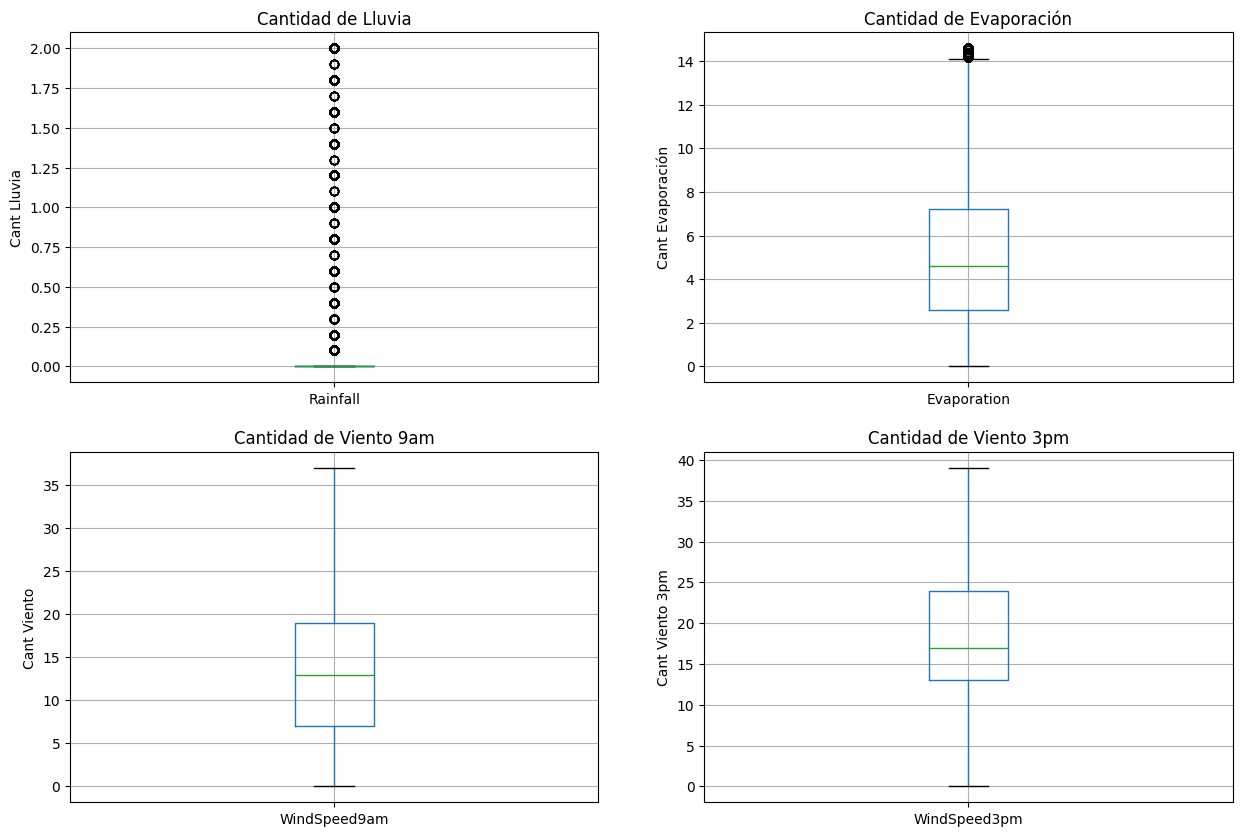

In [531]:
##Grafica para ver el ruido en los datos
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df_f_f.boxplot(column='Rainfall')
fig.set_title('Cantidad de Lluvia')
fig.set_ylabel('Cant Lluvia')

plt.subplot(2,2,2)
fig = df_f_f.boxplot(column='Evaporation')
fig.set_title('Cantidad de Evaporación')
fig.set_ylabel('Cant Evaporación')

plt.subplot(2,2,3)
fig = df_f_f.boxplot(column='WindSpeed9am')
fig.set_title('Cantidad de Viento 9am')
fig.set_ylabel('Cant Viento')

plt.subplot(2,2,4)
fig = df_f_f.boxplot(column='WindSpeed3pm')
fig.set_title('Cantidad de Viento 3pm')
fig.set_ylabel('Cant Viento 3pm')

In [532]:
numericas

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

## Hacer limpieza de moda para categóricos con doble foLimpieza de datos NaN en variables numericas con doble for

In [533]:
datos_NAN(df_f_f)

Dimesiones: 145460 filas, 25 columnas
Total de Valores NAN: 383357
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                Location     object          49          0
                             WindGustDir     object           8      10326
                              WindDir9am     object           8      10566
                              WindDir3pm     object           8       4228
                               RainToday     object           2       3261
                            RainTomorrow     object           2       3267
                                 MinTemp    float64         367       1539
                                 MaxTemp    float64         412       1750
                                Rainfall    float64          21      28839
                             Evaporation    float64         145      64785
                                Sunshine    float64         145      69835
                           

### Crear modelo

In [534]:
## Crear modelo
##Particiones X y
X= df_f_f.drop(['RainTomorrow'], axis=1)
y= df_f_f['RainTomorrow']

In [535]:
##Particiones X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [536]:
categoricosE = [i for i in X_train.columns if X_train[i].dtype=='O']

categoricosE

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [537]:
numericosE = [i for i in X_train.columns if X_train[i].dtype!='O']

numericosE  

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [538]:
## Inputacion de datos numericos con modelo entrenado

##For doble para limpieza de datos
for df1 in [X_train, X_test]:
    for col in numericosE:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [539]:
##For gomelo Dos para categóricos
for df2 in [X_train, X_test]:
    for col in categoricosE:
        col_mode = X_train[col].mode()[0]
        df2[col].fillna(col_mode, inplace=True)

### Inputacion de datos categoricos con df entrenado

## Normalizar

In [540]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.fit_transform(X_test)

X_train.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_0,RainToday_1,MinTemp,MaxTemp,Rainfall,Evaporation,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
111548,Albany,SurOeste,SurEste,SurEste,0,1,14.5,17.8,0.0,4.6,...,52.0,1024.1,1022.5,8.0,5.0,16.2,21.1,2017,4,24
142528,Katherine,SurEste,Norte,NorOeste,1,0,24.6,39.5,0.0,12.0,...,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,2013,10,11
65304,MelbourneAirport,SurEste,SurOeste,Sur,1,0,14.7,26.6,0.2,3.2,...,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,2012,2,18
40651,Williamtown,SurEste,SurOeste,SurEste,1,0,18.3,26.6,0.0,4.6,...,67.0,1017.0,1016.5,6.0,5.0,23.0,25.4,2012,2,18
97487,Adelaide,Oeste,SurOeste,SurOeste,1,0,11.4,19.3,0.6,2.4,...,47.0,1018.6,1017.1,5.0,5.0,14.4,18.3,2011,10,11


In [543]:
X_train = pd.concat([X_train[numericos], X_train[['RainToday_0','RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [544]:
X_test = pd.concat([X_test[numericos], X_test[['RainToday_0','RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [545]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,SurEste,SurOeste,Este,NorEste,NorOeste,Norte,Oeste,Sur,SurEste,SurOeste
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.199941,23.237356,0.124800,4.871761,7.991327,38.853001,13.649096,18.134281,69.491269,51.564992,...,0.251796,0.158231,0.058195,0.155825,0.174395,0.060996,0.069443,0.068232,0.227382,0.185532
std,6.356376,6.964246,0.358041,2.339725,2.755849,11.507357,8.157758,7.935546,17.985353,20.458995,...,0.434047,0.364959,0.234112,0.362691,0.379450,0.239324,0.254208,0.252144,0.419143,0.388730
min,-6.300000,2.500000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.200000,8.200000,31.000000,7.000000,13.000000,58.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.600000,8.400000,37.000000,13.000000,17.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.100000,0.000000,5.000000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.500000,43.600000,2.000000,14.600000,14.500000,72.000000,37.000000,39.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [546]:
###Normalizar
columnas = X_train.columns

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [547]:
##Agregar nombres de columnas
X_train = pd.DataFrame(X_train, columns=[columnas])
X_test = pd.DataFrame(X_test, columns=[columnas])

In [548]:
##Agregar métricas
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,SurEste,SurOeste,Este,NorEste,NorOeste,Norte,Oeste,Sur,SurEste,SurOeste
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.00000,...,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000
mean,0.502312,0.504787,0.061943,0.333522,0.550630,0.498432,0.367660,0.464871,0.626185,0.51507,...,0.250722,0.158841,0.058435,0.157328,0.173931,0.061598,0.069744,0.068266,0.223773,0.186924
std,0.172540,0.169898,0.177008,0.161284,0.190730,0.174087,0.219935,0.202344,0.220498,0.20521,...,0.433436,0.365534,0.234569,0.364116,0.379057,0.240428,0.254720,0.252206,0.416779,0.389857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,0.01000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377717,0.377129,0.000000,0.273973,0.565517,0.378788,0.189189,0.333333,0.487805,0.37000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.497283,0.489051,0.000000,0.315068,0.579310,0.469697,0.351351,0.435897,0.634146,0.52000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.627717,0.625304,0.000000,0.342466,0.600000,0.606061,0.513514,0.615385,0.792683,0.65000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.005435,1.000000,1.000000,1.000000,0.986207,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [549]:
###Revisión de Y - y_train, y_test
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_test.mode()[0], inplace=True)

### Modelo Uno

In [550]:
from sklearn.linear_model import LogisticRegression

reglog1 = LogisticRegression(solver='liblinear', random_state=42)

reglog1.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [551]:
y_pred_test = reglog1.predict(X_test)

y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [552]:
##Probabilidad de que no llueva mañana corresponde a cero 
reglog1.predict_proba(X_test)[:,0]

array([0.2709905 , 0.97645491, 0.64831296, ..., 0.84397101, 0.71409084,
       0.85154372])

In [553]:
##Probabilidad de que llueva mañana corresponde a uno
reglog1.predict_proba(X_test)[:,1]

array([0.7290095 , 0.02354509, 0.35168704, ..., 0.15602899, 0.28590916,
       0.14845628])

In [554]:
###Eficiencia del modelo con testeo
from sklearn.metrics import accuracy_score

print("La eficiencia del modelo de manera general es: {0:0.4f}".format(accuracy_score(y_test, y_pred_test)))

La eficiencia del modelo de manera general es: 0.8438


In [555]:
y_pred_train = reglog1.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [556]:
print("La eficiencia del modelo de manera general es: {0:0.4f}".format(accuracy_score(y_train, y_pred_train)))

La eficiencia del modelo de manera general es: 0.8460


In [557]:
reglog2 = LogisticRegression(C=100 ,solver='liblinear', random_state=42)

reglog2.fit(X_train, y_train)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [558]:
print("La eficiencia del modelo de manera general es C100: {:.4f}".format(reglog2.score(X_train, y_train)))
print("La eficiencia del modelo de manera general es C100: {:.4f}".format(reglog2.score(X_test, y_test)))

La eficiencia del modelo de manera general es C100: 0.8460
La eficiencia del modelo de manera general es C100: 0.8438


In [559]:
##Métricas - Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

print('Matriz de confusión\n\n', cm)

print('True Positives (TP)=', cm[0,0])
print('True Negatives (TN)=', cm[1,1])
print('False Positives (FP)=', cm[0,1])
print('False Negatives (FN)=', cm[1,0])

Matriz de confusión

 [[21453  1219]
 [ 3325  3095]]
True Positives (TP)= 21453
True Negatives (TN)= 3095
False Positives (FP)= 1219
False Negatives (FN)= 3325


En este caso, la matriz de confusión indica que su modelo clasificó correctamente 21,453 observaciones como verdaderos positivos y 3,095 observaciones como verdaderos negativos. Sin embargo, el modelo clasificó incorrectamente 1,219 observaciones como falsos positivos y 3,325 observaciones como falsos negativos.

In [567]:
(21453+3095)/29092

0.843805857280352

Esto significa que su modelo clasificó correctamente el 83.58% de las observaciones.

In [568]:
(1219+3325)/29092

0.15619414271964802

<Axes: >

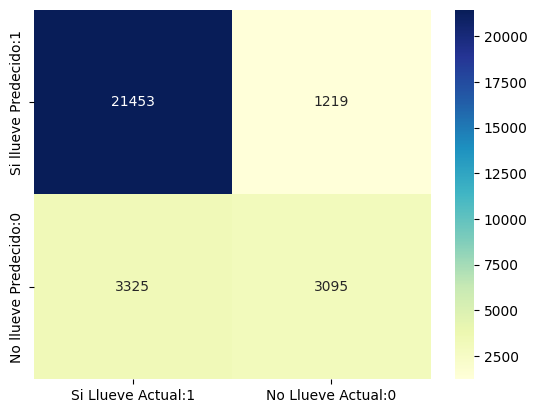

In [560]:
##Hacer la gráfica 
cm_matrix = pd.DataFrame(data=cm, columns=['Si Llueve Actual:1','No Llueve Actual:0'],
                         index=['Si llueve Predecido:1','No llueve Predecido:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [561]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.90     22672
         Yes       0.72      0.48      0.58      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



la tabla muestra que su modelo tuvo una precisión de 0.87 y un recall de 0.95 para la clase "No" y una precisión de 0.72 y un recall de 0.48 para la clase "Yes". Esto significa que el modelo clasificó correctamente el 87% de las observaciones de la clase "No" y el 72% de las observaciones de la clase "Yes". El recall, por otro lado, indica cuántas de las observaciones positivas (en este caso, "Yes") se detectaron correctamente. El recall fue alto para la clase "No" (0.95), lo que indica que el modelo detectó correctamente la mayoría de las observaciones de la clase "No". Sin embargo, el recall fue bajo para la clase "Yes" (0.48), lo que indica que el modelo no detectó correctamente muchas de las observaciones de la clase "Yes". El F1-score es una medida que combina la precisión y el recall y es útil cuando desea comparar modelos con diferentes trade-offs entre estas dos métricas. El F1-score es más bajo para la clase "Yes" (0.58) que para la clase "No" (0.90), lo que indica que el modelo tuvo un desempeño generalmente peor para la clase "Yes".

In [562]:
###Probabilidades de las primeras 10 filas de llueva mañana o no
y_pred_prob = reglog1.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.2709905 , 0.7290095 ],
       [0.97645491, 0.02354509],
       [0.64831296, 0.35168704],
       [0.90213346, 0.09786654],
       [0.5075466 , 0.4924534 ],
       [0.93699833, 0.06300167],
       [0.96464715, 0.03535285],
       [0.66667788, 0.33332212],
       [0.82475478, 0.17524522],
       [0.4912856 , 0.5087144 ]])

In [563]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob No Llueva (0)', 'Prob Llueva (1)'])

y_pred_prob_df

,Prob No Llueva (0),Prob Llueva (1)
0,0.270991,0.729009
1,0.976455,0.023545
2,0.648313,0.351687
3,0.902133,0.097867
4,0.507547,0.492453
5,0.936998,0.063002
6,0.964647,0.035353
7,0.666678,0.333322
8,0.824755,0.175245
9,0.491286,0.508714


In [564]:
###Grafica ROC - AUC

y_pred1 = reglog1.predict_proba(X_test)[:,1]

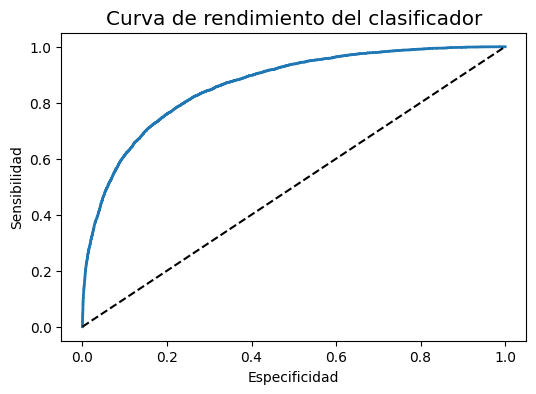

In [565]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1],[0,1], 'k--')

plt.rcParams['font.size']=12

plt.title('Curva de rendimiento del clasificador')

plt.xlabel('Especificidad')

plt.ylabel('Sensibilidad')

plt.show()

In [566]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred1)

roc_auc

0.8631846382489442